In [51]:
import pandas as pd
import numpy as np

In [72]:
df = pd.read_excel('data/OPT_Study_Person-level_Data (1).xlsx')
select = df[df['Preg ended < 37 wk']!='   ']

In [73]:
subta=select[["Group","Black","White","BMI","N prev preg",
  "N qualifying teeth","BL %BOP","BL PD avg","BL %PD>4","BL %PD>5","BL Calc I","BL Pl I",
  "BL CAL avg","BL %CAL>2","BL %CAL>3","Preg ended < 37 wk"]]

subta

,Group,Black,White,BMI,N prev preg,N qualifying teeth,BL %BOP,BL PD avg,BL %PD>4,BL %PD>5,BL Calc I,BL Pl I,BL CAL avg,BL %CAL>2,BL %CAL>3,Preg ended < 37 wk
0,C,Yes,No,NaN,NaN,13,48.214,2.696,17.857,5.357,1.028,1.583,1.291,38.182,5.455,No
1,C,Yes,No,21.0,5.0,12,79.762,2.685,17.857,10.119,0.861,1.194,1.119,25.000,10.119,Yes
2,T,No,Yes,24.0,2.0,16,80.247,2.821,25.309,12.346,0.972,0.917,1.407,42.593,16.049,No
3,C,Yes,No,36.0,4.0,15,100.000,2.814,17.308,5.769,2.083,2.028,1.494,38.312,13.636,No
4,C,No,Yes,27.0,NaN,16,94.048,2.768,23.214,14.286,1.111,1.083,1.327,40.476,14.286,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,T,Yes,No,31.0,4.0,13,71.605,2.685,24.074,0.000,1.417,1.500,2.327,87.037,35.802,No
819,C,Yes,No,28.0,3.0,12,54.167,2.542,20.833,0.000,1.528,1.167,1.893,64.286,24.405,No
820,C,Yes,No,36.0,2.0,12,77.536,3.043,27.536,5.797,0.917,1.361,2.572,94.203,43.478,No
821,T,Yes,No,20.0,1.0,11,52.564,2.551,18.590,0.641,1.000,1.250,2.115,78.205,26.923,No


In [74]:
y=[]
for i in list(subta["Preg ended < 37 wk"]):
    if i=='No ':
        y.append(0.)
    else:
        y.append(1.)
subta["outcome"] = y

y=[]
for i in list(subta["Black"]):
    if i=='Yes':
        y.append(1.)
    else:
        y.append(0.)
subta["black"] = y

y=[]
for i in list(subta["White"]):
    if i=='Yes':
        y.append(1.)
    else:
        y.append(0.)
subta["white"] = y

subta= subta.drop(["Black","White","Preg ended < 37 wk"],axis=1)
subta.head()

<ipython-input-74-9282e2bd2ae5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subta["outcome"] = y
<ipython-input-74-9282e2bd2ae5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subta["black"] = y
<ipython-input-74-9282e2bd2ae5>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

,Group,BMI,N prev preg,N qualifying teeth,BL %BOP,BL PD avg,BL %PD>4,BL %PD>5,BL Calc I,BL Pl I,BL CAL avg,BL %CAL>2,BL %CAL>3,outcome,black,white
0,C,NaN,NaN,13,48.214,2.696,17.857,5.357,1.028,1.583,1.291,38.182,5.455,0.0,1.0,0.0
1,C,21.0,5.0,12,79.762,2.685,17.857,10.119,0.861,1.194,1.119,25.000,10.119,1.0,1.0,0.0
2,T,24.0,2.0,16,80.247,2.821,25.309,12.346,0.972,0.917,1.407,42.593,16.049,0.0,0.0,1.0
3,C,36.0,4.0,15,100.000,2.814,17.308,5.769,2.083,2.028,1.494,38.312,13.636,0.0,1.0,0.0
4,C,27.0,NaN,16,94.048,2.768,23.214,14.286,1.111,1.083,1.327,40.476,14.286,0.0,0.0,1.0


In [75]:
l=[]
treatment = subta["Group"]

for i in treatment:
    if i=="C":
        l.append(1)
    else:
        l.append(0)
treatment=np.array(l)        
y= subta["outcome"]
subta['treatment'] = treatment
subta = subta.drop(['Group'],axis=1)

In [76]:
import miceforest as mf
# Create kernels.  #mice forest
kernel = mf.ImputationKernel(
  data=subta,
  save_all_iterations=True,
  random_state=1343
)
# Run the MICE algorithm for 3 iterations on each of the datasets
kernel.mice(3,verbose=True)
#print(kernel)
completed_dataset = kernel.complete_data(dataset=0, inplace=False)

Initialized logger with name mice 1-3
Dataset 0
1  | BMI | N prev preg
2  | BMI | N prev preg
3  | BMI | N prev preg


In [78]:
import pandas as pd
from sklearn import preprocessing

x = completed_dataset.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
tst=pd.DataFrame(x_scaled,columns=completed_dataset.columns)
tst.head()

,BMI,N prev preg,N qualifying teeth,BL %BOP,BL PD avg,BL %PD>4,BL %PD>5,BL Calc I,BL Pl I,BL CAL avg,BL %CAL>2,BL %CAL>3,outcome,black,white,treatment
0,0.075472,0.3,0.40,0.215946,0.165168,0.149441,0.058440,0.342667,0.518682,0.224159,0.366742,0.057499,0.0,1.0,0.0,1.0
1,0.113208,0.4,0.36,0.693591,0.163018,0.149441,0.110389,0.287000,0.386549,0.189299,0.231707,0.106659,1.0,1.0,0.0,1.0
2,0.169811,0.1,0.52,0.700934,0.189601,0.227394,0.134683,0.324000,0.292459,0.247669,0.411928,0.169165,0.0,0.0,1.0,0.0
3,0.396226,0.3,0.48,1.000000,0.188233,0.143698,0.062934,0.694333,0.669837,0.265302,0.368074,0.143731,0.0,1.0,0.0,1.0
4,0.226415,0.2,0.52,0.909885,0.179242,0.205479,0.155847,0.370333,0.348845,0.231455,0.390242,0.150582,0.0,0.0,1.0,1.0


In [135]:
tl =tst[tst['black']==1]
tl =tl.drop(['black','white'],axis=1)
tl.head()

,BMI,N prev preg,N qualifying teeth,BL %BOP,BL PD avg,BL %PD>4,BL %PD>5,BL Calc I,BL Pl I,BL CAL avg,BL %CAL>2,BL %CAL>3,outcome,treatment
0,0.075472,0.3,0.40,0.215946,0.165168,0.149441,0.058440,0.342667,0.518682,0.224159,0.366742,0.057499,0.0,1.0
1,0.113208,0.4,0.36,0.693591,0.163018,0.149441,0.110389,0.287000,0.386549,0.189299,0.231707,0.106659,1.0,1.0
3,0.396226,0.3,0.48,1.000000,0.188233,0.143698,0.062934,0.694333,0.669837,0.265302,0.368074,0.143731,0.0,1.0
6,0.320755,0.1,0.64,0.882845,0.173378,0.180572,0.058440,0.500000,0.537704,0.224362,0.371946,0.075291,0.0,0.0
7,0.301887,0.3,0.28,0.454950,0.188038,0.143960,0.094549,0.370333,0.330163,0.247669,0.378533,0.119456,0.0,1.0


In [136]:
from xgboost import XGBClassifier
from causalml.inference.meta import LRSRegressor, BaseSRegressor
# Machine learning model
from lightgbm import LGBMRegressor

In [137]:
y = tl['BMI']
tl=tl.drop(['outcome','BMI'],axis=1)
features = tl

In [138]:
# Initiate the 
#s_learner_c = XGBClassifier()

# Initiate the 
s_learner_c = LGBMRegressor()

# Fit the model
s_learner_c.fit(features, y)

# Set treatment value to 1
with_treatment = features.assign(treatment = 1)
# With treatment predictions
with_treatment_predict = s_learner_c.predict(with_treatment)
# Set treatment value to 0
without_treatment = features.assign(treatment = 0)
# With treatment predictions
without_treatment_predict = s_learner_c.predict(without_treatment)

In [139]:
# ITE
ite = with_treatment_predict - without_treatment_predict
# Save ITE data in a pandas dataframe
ite_df = pd.DataFrame({'ITE': ite, 'with_treatment_predict':with_treatment_predict, 'without_treatment_predict': without_treatment_predict})
# Take a look at the data
ite_df.head()

,ITE,with_treatment_predict,without_treatment_predict
0,0.001654,0.113291,0.111637
1,-0.003463,0.173858,0.177321
2,0.002930,0.322100,0.319171
3,-0.004167,0.243963,0.248130
4,0.002822,0.291691,0.288869


array([[<AxesSubplot:title={'center':'ITE'}>]], dtype=object)

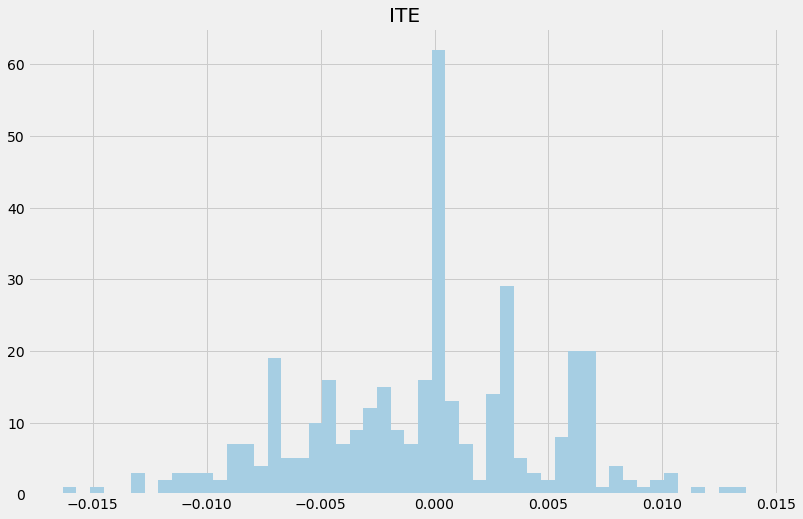

In [140]:
# visualization
ite_df.hist(column ='ITE', bins=50, grid=True, figsize=(12, 8))

In [144]:
# Calculate ATE
ATE = ite.mean()
# Print out results
print(f'The average treatment effect (ATE) is {ATE:.7f}')

The average treatment effect (ATE) is -0.0004769


In [142]:
# Create the segmentation function
def segmentation(x):
    if x < -0.5:
        return 'sleeping-dog'
    elif x > 0.5:
        return 'persuadable'
    else:
        return 'no_impact'
# Apply the function 
ite_df['segment'] = ite_df['ITE'].apply(segmentation)
# Take a look at the data
ite_df

,ITE,with_treatment_predict,without_treatment_predict,segment
0,0.001654,0.113291,0.111637,no_impact
1,-0.003463,0.173858,0.177321,no_impact
2,0.002930,0.322100,0.319171,no_impact
3,-0.004167,0.243963,0.248130,no_impact
4,0.002822,0.291691,0.288869,no_impact
...,...,...,...,...
362,-0.002757,0.297232,0.299989,no_impact
363,-0.005412,0.315734,0.321145,no_impact
364,0.000000,0.328276,0.328276,no_impact
365,0.012643,0.172885,0.160242,no_impact


<AxesSubplot:xlabel='segment', ylabel='count'>

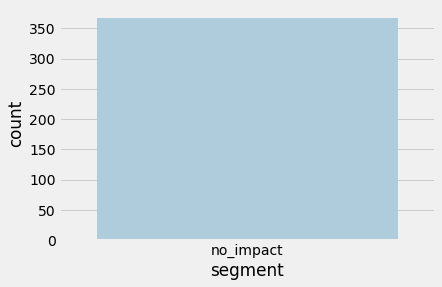

In [143]:
import seaborn as sns
# Visualization
sns.countplot(x=ite_df['segment'])